# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate correlations between features
- Extract relevant insights to determine steps for feature engineering

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
event_df = pl.read_csv("../data/events.csv")
category_tree_df = pl.read_csv("../data/category_tree.csv")
items_df = pl.read_csv("../data/item_properties.csv")

In [3]:
event_df.head()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null


In [4]:
# Unique visitors 
print("Unique visitors:")
print(event_df.select(pl.col('visitorid').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 1407580   │
└───────────┘


In [5]:
# Total visitors 
print("Total visitors:")
print(event_df.select(pl.col('visitorid').len()))

Total visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 2756101   │
└───────────┘


In [6]:
df_count = event_df["event"].value_counts(sort=True)
df_count

event,count
str,u32
"""view""",2664312
"""addtocart""",69332
"""transaction""",22457


In [7]:
# Total transactions 
print("Number of transactions: ",df_count['count'][-1])

# Percent of transactions vs all other events 
print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

Number of transactions:  22457
Percent of transactions: 0.815


In [8]:
category_tree_df

categoryid,parentid
i64,i64
1016,213
809,169
570,9
1691,885
536,1691
…,…
49,1125
1112,630
1336,745


### Univariate Analysis 

In [9]:
event_df

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null
…,…,…,…,…
1438398785939,591435,"""view""",261427,null
1438399813142,762376,"""view""",115946,null
1438397820527,1251746,"""view""",78144,null


### Multivariate Analysis 

In [10]:
grouped_df = event_df.group_by(pl.col('event')).agg(pl.col('itemid'))
grouped_df

event,itemid
str,list[i64]
"""transaction""","[356475, 15335, … 312728]"
"""addtocart""","[5206, 10572, … 346534]"
"""view""","[355908, 248676, … 152913]"


In [33]:
most_popular_bought_item = Counter(grouped_df.row(0)[1])
most_popular_bought_item

Counter({461686: 133,
         119736: 97,
         213834: 92,
         7943: 46,
         312728: 46,
         445351: 45,
         48030: 41,
         420960: 38,
         248455: 38,
         17478: 37,
         409804: 35,
         320130: 33,
         416017: 32,
         46156: 31,
         369447: 31,
         268883: 29,
         334401: 28,
         257040: 27,
         441852: 27,
         9877: 25,
         37029: 25,
         318333: 23,
         546: 23,
         450082: 22,
         138427: 20,
         190000: 20,
         222888: 20,
         10572: 19,
         369158: 19,
         217605: 19,
         46232: 19,
         382885: 19,
         29196: 19,
         417927: 18,
         301721: 18,
         379520: 17,
         369933: 17,
         288525: 16,
         234255: 16,
         92466: 16,
         42002: 16,
         448453: 16,
         23762: 15,
         444190: 15,
         170262: 15,
         309778: 15,
         384302: 15,
         132683: 15,
        

In [12]:
most_popular_cart_item = Counter(grouped_df.row(2)[1])
most_popular_cart_item

Counter({187946: 3410,
         461686: 2539,
         5411: 2325,
         370653: 1854,
         219512: 1740,
         298009: 1642,
         96924: 1633,
         309778: 1565,
         257040: 1531,
         384302: 1528,
         335975: 1428,
         111530: 1397,
         441668: 1389,
         7943: 1346,
         320130: 1333,
         151444: 1230,
         234255: 1214,
         190000: 1164,
         142466: 1135,
         37029: 1131,
         369447: 1103,
         112782: 1094,
         65273: 1076,
         434782: 1069,
         9877: 1067,
         315543: 1043,
         161623: 1039,
         91755: 1024,
         102306: 1013,
         400946: 1001,
         350629: 995,
         48030: 986,
         354233: 983,
         29100: 982,
         312728: 947,
         445351: 939,
         290999: 928,
         29196: 912,
         133907: 909,
         241555: 907,
         455183: 904,
         341482: 884,
         315545: 874,
         133814: 874,
         441852

In [13]:
most_popular_viewed_item = Counter(grouped_df.row(1)[1])
most_popular_viewed_item

Counter({461686: 306,
         312728: 162,
         409804: 156,
         320130: 141,
         29196: 136,
         7943: 97,
         48030: 95,
         441852: 90,
         445351: 89,
         257040: 89,
         316753: 84,
         369447: 80,
         234255: 77,
         46232: 72,
         17478: 72,
         37029: 71,
         9877: 70,
         158666: 68,
         384302: 65,
         65273: 64,
         279457: 63,
         390591: 62,
         339703: 61,
         420960: 60,
         208939: 59,
         222888: 58,
         444190: 53,
         10572: 52,
         46156: 52,
         268883: 52,
         248455: 52,
         416017: 49,
         309778: 48,
         122604: 48,
         219512: 48,
         253615: 47,
         190000: 47,
         287449: 46,
         315543: 46,
         218794: 46,
         171878: 46,
         447661: 45,
         546: 45,
         318333: 44,
         198209: 44,
         119736: 44,
         12217: 44,
         325852: 44,
   

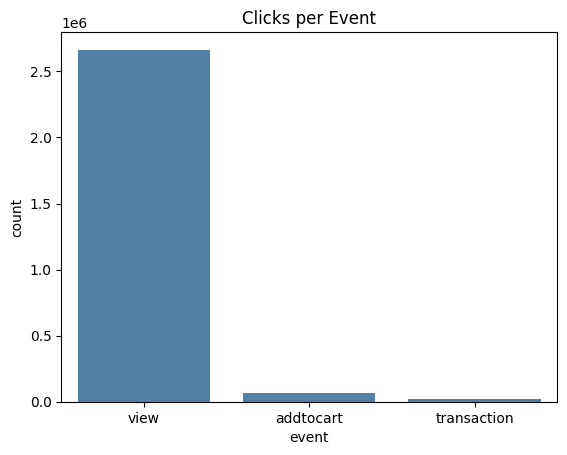

In [14]:
sns.barplot(
    y=df_count['count'],
    x=df_count['event'], 
    color='steelblue'
)
plt.title("Clicks per Event")
plt.show()

In [15]:
purchase_df = event_df.filter(pl.col('event') == 'transaction')
purchase_df.tail()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1438377176570,1050575,"""transaction""",31640,"""8354"""
1438379878779,861299,"""transaction""",456602,"""3643"""
1438357730123,855941,"""transaction""",235771,"""4385"""
1438355560300,548772,"""transaction""",29167,"""13872"""
1438358989163,1051054,"""transaction""",312728,"""17579"""


In [53]:
purchasing_customers = event_df.filter(pl.col("transactionid").is_not_null()).select("visitorid").unique().to_series().to_list()
purchasing_customers

[502170,
 915069,
 169902,
 666162,
 1386710,
 224553,
 1377272,
 389066,
 628803,
 1365610,
 888860,
 877058,
 590670,
 616081,
 624072,
 1236753,
 1102257,
 715841,
 568495,
 48768,
 520400,
 740743,
 831854,
 221662,
 220099,
 293501,
 910106,
 109850,
 508863,
 655539,
 200559,
 1281052,
 1315273,
 1256683,
 1231909,
 1025839,
 561436,
 1055329,
 1233201,
 611362,
 477155,
 879818,
 1220101,
 1297960,
 480552,
 36707,
 884927,
 1099905,
 17569,
 1336367,
 1183412,
 434803,
 521576,
 602451,
 264398,
 625653,
 1274505,
 834998,
 155340,
 550158,
 1192567,
 697361,
 435336,
 32378,
 11287,
 366382,
 329154,
 654878,
 1084182,
 850462,
 554612,
 1296257,
 947843,
 1246441,
 1069754,
 291938,
 810608,
 6699,
 199919,
 304654,
 359293,
 934487,
 672066,
 1277783,
 457097,
 480933,
 1335459,
 1308455,
 227054,
 486983,
 1184189,
 1357744,
 798809,
 1005010,
 58730,
 1249201,
 1401260,
 1146172,
 688825,
 235560,
 831449,
 1310560,
 580562,
 438605,
 677571,
 1359706,
 883745,
 666168,
 1

In [54]:
purchased = []

for i in purchasing_customers:
        items = event_df.filter((pl.col("visitorid") == pl.lit(i)) & (pl.col("transactionid").is_not_null())
                                ).select("itemid").to_series().to_list()    
        purchased.append(items)

In [55]:
purchased

[[318274],
 [212006],
 [355393],
 [153666],
 [226776],
 [144936],
 [88453],
 [369933],
 [188944],
 [453790],
 [131745],
 [17137, 446934],
 [348938],
 [379816, 198376],
 [280328],
 [336393, 185179, 435090, 185179, 435090, 336393],
 [254196, 211336],
 [312728],
 [461686],
 [19883],
 [271393],
 [234299],
 [170277],
 [442837],
 [394590],
 [445821],
 [58726],
 [329408],
 [68454],
 [379660],
 [286217, 286217, 435002, 286217],
 [284080, 217990, 410355],
 [181651],
 [282385, 366713],
 [277074],
 [144540],
 [50411],
 [247306, 413816],
 [316472],
 [196404],
 [234255],
 [233128, 275874, 390226],
 [179538],
 [253430],
 [255902],
 [88921],
 [325611],
 [399031],
 [229749],
 [463872],
 [461686],
 [62404, 418201, 446981, 432912],
 [433834],
 [95336],
 [430240],
 [344071, 360213, 271950],
 [299222, 299222],
 [180363, 385355],
 [431472],
 [185082, 307733, 297145],
 [78163],
 [19976],
 [385735],
 [269611, 350397],
 [90293],
 [1377, 386160],
 [261269],
 [338435],
 [199931],
 [64776],
 [305792],
 [18171],


In [60]:
def recommendations(item_id, items_purchased):
    recommendation_list =[]
    for i in items_purchased:
        if item_id in i:
            recommendation_list +=i
    
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list[:5]

In [61]:
recommendations(31640, purchased)

[424193, 246532, 217605, 149767, 124938]